In [1]:
using Pkg
Pkg.activate("SchrodingerEquationSolver")
include("SchrodingerEquationSolver.jl")

  Activating new project at `~/Desktop/physics_coding_projects/julia/SchrodingerEquationSolver/src/SchrodingerEquationSolver`


Main.SchrodingerEquationSolver

In [2]:
import .SchrodingerEquationSolver as ses
import .ses.Grids as Grids
import .ses.Potentials as Potentials
import .ses.MathUtils as MathUtils
import .ses.Hydrogen as Hydrogen
import .ses.InitialConditions as InitialConditions
import .ses.OneDSchrodingerEquationSolver as odses
import .ses.EigenvalueFinders as EigenvalueFinders

In [3]:
using Plots

In [5]:
r_min::Float64=0.0;
r_max::Float64=50.0;
Z::Int64=2;
l::Int64=0;

In [6]:
#grid= Grids.uniform_grid(r_min, r_max, N);
grid= ses.Grids.exponential_grid(r_max, Z);
N::Int64=size(grid)[1];

In [7]:
v_colu= Potentials.coulomb_potential(Z, grid);
v_angu= Potentials.angular_potential(l, grid);
v_effe= v_colu; #+ v_angu;

0.0045987534208675185

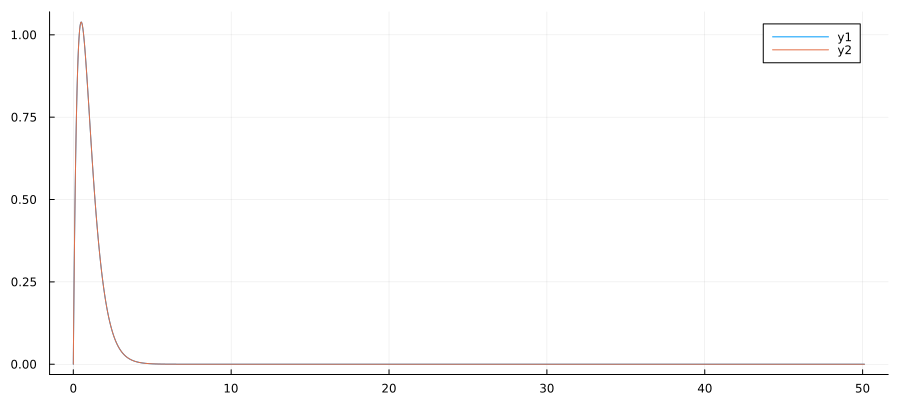

In [12]:
ei= -2.01
init_valu1_fwrd, init_valu2_fwrd,
init_valu1_bwrd, init_valu2_bwrd =InitialConditions.atom(grid, ei, l);
u_merged, merge_value= odses.solver(ei,init_valu1_fwrd,init_valu2_fwrd, init_valu1_bwrd,
init_valu2_bwrd, v_effe, grid);
print(merge_value)
plot!(grid, u_merged)
plot!(size=(900,400))

-1.278807066046328e-6

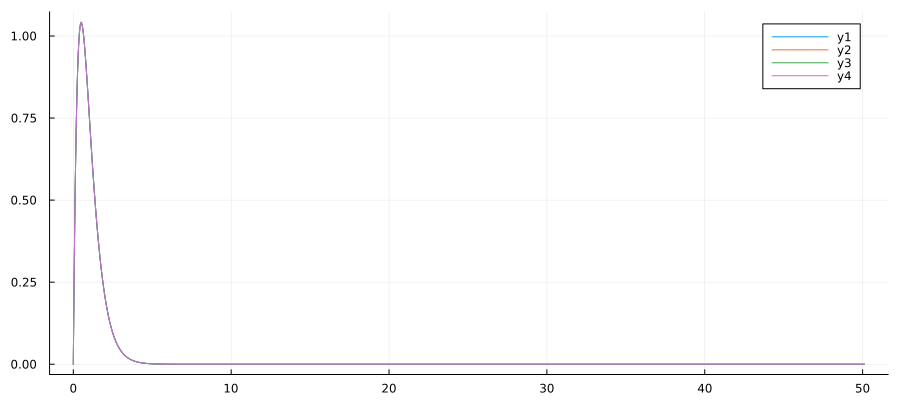

In [14]:
ei= -1.999999
init_valu1_fwrd, init_valu2_fwrd,
init_valu1_bwrd, init_valu2_bwrd =InitialConditions.atom(grid, ei, l);
u_merged, merge_value= odses.solver(ei,init_valu1_fwrd,init_valu2_fwrd, init_valu1_bwrd,
init_valu2_bwrd, v_effe, grid);
print(merge_value)
plot!(grid, u_merged)
plot!(size=(900,400))

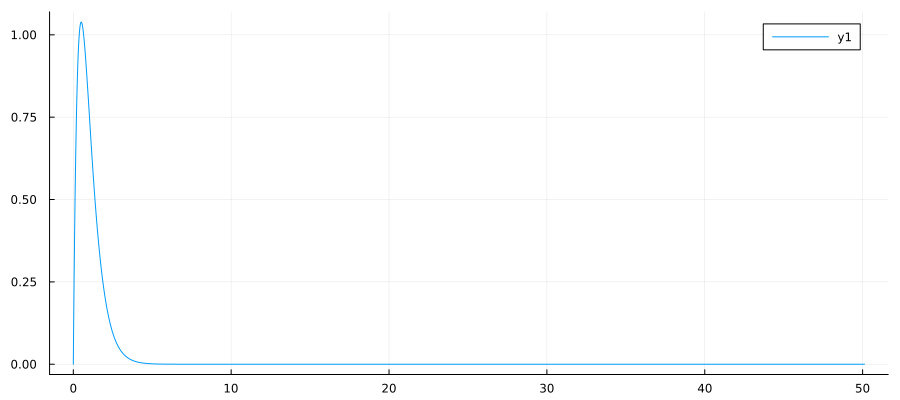

In [11]:
plot!(grid, u_merged)
plot!(size=(900,400))